## Current injection simulation
This notebook runs a predefined neuron with current injection. Nothing fancy, very basic. This version uses BasalGangliaData

In [1]:
from snudda import Snudda

In [2]:
network_path = "network/single_neuron"
ss = Snudda(network_path=network_path)
ss.init_tiny(neuron_paths=["../../../BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/"],
             neuron_names=["dSPN"], number_of_neurons=[1], random_seed=123,
             morphology_key=["m22be6817"],
             parameter_key=["p1863c9a5"])

Adding neurons: dSPN from dir ../../../BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/
Writing network/single_neuron/network-config.json


In [3]:
ss.create_network()

Placing neurons
Network path: network/single_neuron
Reading SNUDDA_DATA=None from network/single_neuron/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from network/single_neuron/network-synapses.hdf5
No n_putative_points and putative_density, setting n_putative_points = 46
(this must be larger than the number of neurons you want to place)
Generating 46 points for network/single_neuron/mesh/Cube-cube-mesh-2.3159794767993218e-05.obj
Filtering, keeping inside points: 1 / 20
neuron_name = 'dSPN', num = 1, neuron_path = '../../../BasalGangliaData/data/neurons/striatum/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20211026/'
stop_parallel disabled, to keep pool running.

Execution time: 0.0s
Touch detection
Network path: network/single_neuron
Reading SNUDDA_DATA=None from network/single_neuron/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from network/single_neuron/network-synapses.hdf5
No d_view specified, running dis

In [4]:
simulation_config = {"current_injection_info" : {"0": {"time": [0, 0.4999, 0.5, 0.9999, 1, 10],
                                                       "current": [0, 0, 300e-12, 300e-12, 0, 0]}}}

In [5]:
ss.simulate(simulation_config=simulation_config, verbose=True, time=2.0)

MPI Rank: 0, Size: 1
Using input file None
Reading SNUDDA_DATA=None from network/single_neuron/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from network/single_neuron/network-synapses.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64, aarch64, arm64 directories (or nrnmech.dll) then you will force a recompilation of the modules.
Reading SNUDDA_DATA=None from network/single_neuron/network-config.json
Reading SNUDDA_DATA=/home/hjorth/HBP/Snudda/snudda/utils/../data from network/single_neuron/network-synapses.hdf5
MPI Rank: 0, Size: 1 -- NEURON: This is node 0 out of 1
Using network_file: network/single_neuron/network-synapses.hdf5
Using input_file: None
Using output_file: network/single_neuron/simulation/output.hdf5
Using logFile: network/single_neuron/log/network-simulation-log.txt-0
Worker 0 : Loading network from network/single_neuron/network-synapses.hdf5
Loading config file 

In [6]:
from snudda.utils import SnuddaLoadSimulation
sls = SnuddaLoadSimulation(network_path=network_path)

Loading network/single_neuron/simulation/output.hdf5


In [7]:
sls.list_data_types(neuron_id=0)

['spikes', 'voltage']

In [8]:
time = sls.get_time()
neuron_id = 0
voltage = sls.get_data(neuron_id=0, data_type="voltage")[0][neuron_id]

Text(0, 0.5, 'voltage')

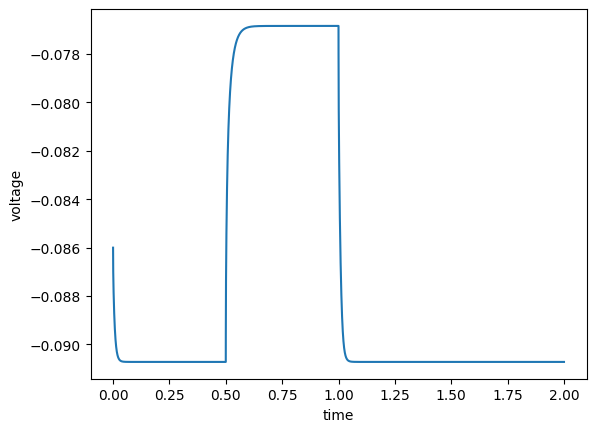

In [9]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(time, voltage)
plt.xlabel("time")
plt.ylabel("voltage")